In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [14]:
X, y = make_blobs( n_features=2, n_samples=1000, centers=3, random_state=42 )

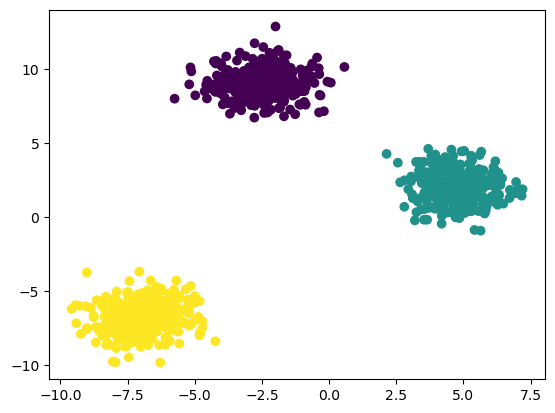

In [18]:
plt.scatter( X[:,0], X[:,1] , c=y)

In [6]:
X.shape

(1000, 2)

In [7]:
y.shape

(1000,)

In [10]:
X_train, X_test, y_train,y_test = train_test_split( X,y ,random_state=42 )

In [11]:
y_train.shape

(750,)

In [12]:
X_train.shape

(750, 2)

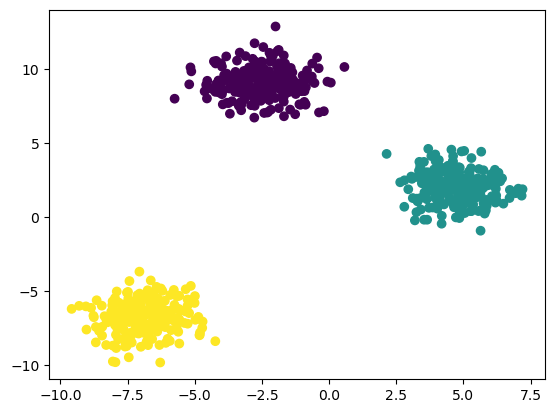

In [19]:
plt.scatter( X_train[:,0], X_train[:,1] , c=y_train)

## Find the K value for Kmeans 

In [22]:
# elbow method

wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i )
    y = kmeans.fit(X_train)
    wcss.append( y.inertia_)

C:\Users\smits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

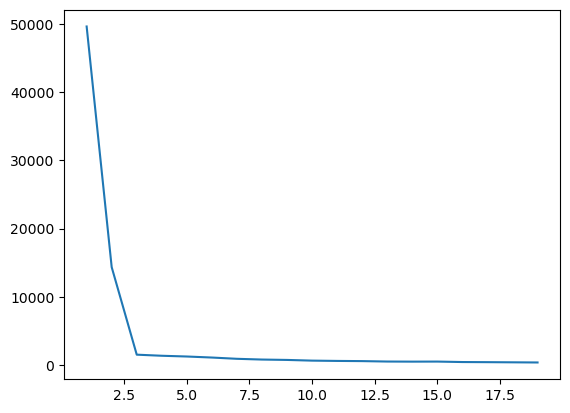

In [26]:
plt.plot(range(1,20), wcss)
plt.show()

In [31]:
!pip install kneed 

In [35]:
# kneed 

from kneed import KneeLocator 

knee = KneeLocator(range(1,20), wcss, curve='convex', direction='decreasing')  # convex for decreasing ,concave for increasing 
print(knee.elbow)   

3


## Evaluation of KMeans 

In [37]:
## performance metrics 

silhouette_sc = []

for i in range(2,20):
    kmeans = KMeans( n_clusters=i)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_) 
    silhouette_sc.append(score)


C:\Users\smits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'silhouette_score')

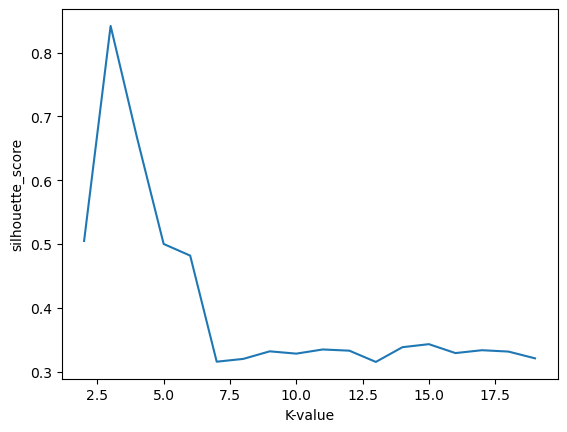

In [41]:
plt.plot(range(2,20),silhouette_sc)
plt.xlabel("K-value")
plt.ylabel("silhouette_score")

In [42]:
# we see the for the value of k =3 we achieve the highest silhouette score nearby 0.84
silhouette_sc

[np.float64(0.5049237343779592),
 np.float64(0.8417883929960392),
 np.float64(0.6660539063063704),
 np.float64(0.5002290509857553),
 np.float64(0.4819759516802404),
 np.float64(0.31580656397841045),
 np.float64(0.32018141656288834),
 np.float64(0.3320518997130385),
 np.float64(0.3284361853125613),
 np.float64(0.3349703081838973),
 np.float64(0.3330751442306224),
 np.float64(0.3154569085628163),
 np.float64(0.33851132421758934),
 np.float64(0.34327294717249485),
 np.float64(0.32930048404047996),
 np.float64(0.3337974295712067),
 np.float64(0.3316622804134485),
 np.float64(0.32107310589302906)]

In [46]:
kmeans = KMeans(n_clusters=3)


C:\Users\smits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


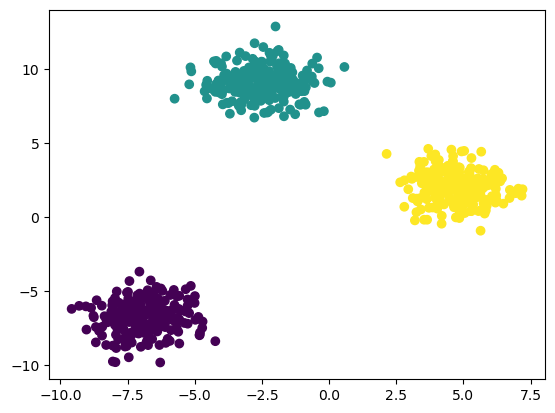

In [47]:
# train data check 
y_labels = kmeans.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1],c=y_labels)

C:\Users\smits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


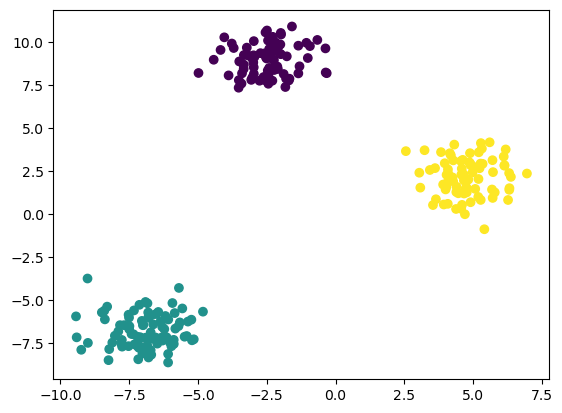

In [48]:
# test data check 

y_test_labels = kmeans.fit_predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1],c=y_test_labels)